In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../..'))
sys.path.insert(0, os.path.abspath('../../src'))

## Demo II: Multivariate time series segmentation

In [2]:
from pytseg.plot import plot_multi

### Create test data

In [ ]:
import numpy as np
from pytseg.data import test_fun
from pytseg.seg_multi import normalize_multi

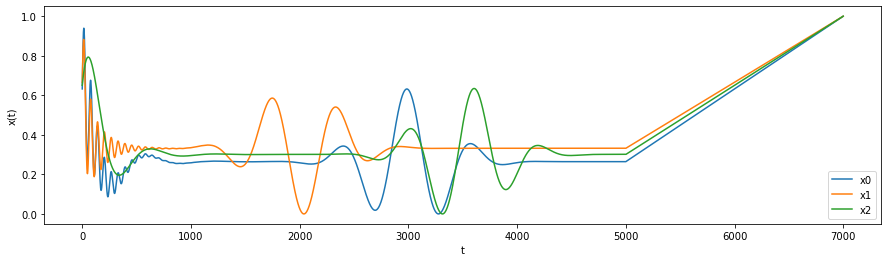

In [3]:
x1, t = test_fun()
x2, _ = test_fun(t, λ6=1/50, λ9=2000)
x3, _ = test_fun(t, λ1=2, λ2=1/100, λ9=3500)
X = np.vstack([x1,x2,x3]).T

X, t = normalize_multi(X, t)
plot_multi(X, t=t, figure_kwarg_dict=dict(figsize=(15,4)), label='x')

### Segmentation

In [4]:
from seg_multi import cut_multi

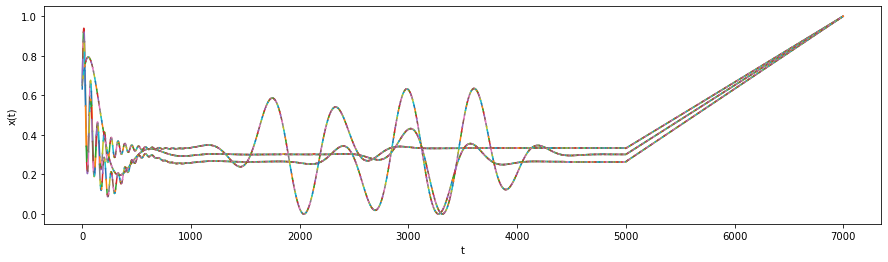

In [5]:
S = cut_multi(X, .95, 3)
plot_multi(X, S=S, figure_kwarg_dict=dict(figsize=(15,4)))

### Stationarity

In [6]:
from seg_multi import segment_stationarity_multi

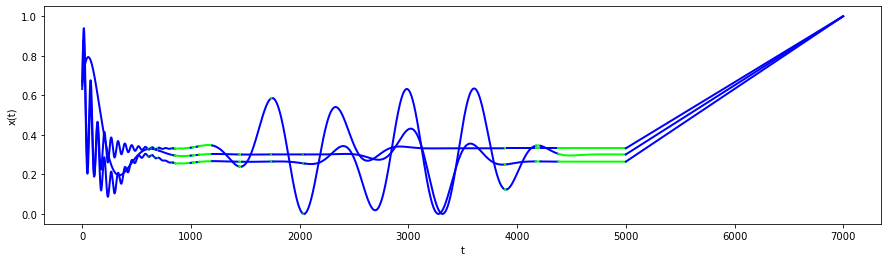

In [7]:
s, l = segment_stationarity_multi(X, S, threshold=.001)
plot_multi(X, t=t, S=[s]*X.shape[1], L=[l]*X.shape[1], figure_kwarg_dict=dict(figsize=(15,4)), plot_kwarg_dict=dict(lw=2))